Пятая практика. Визуализация многомерных данных.

Импорт библиотек:

In [1]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import umap.umap_ as umap
import umap.plot as umapPlot
import ssl
import time
import os.path

Загрузка датасета "mnist_784":

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

pendigits = sklearn.datasets.load_digits()

#data_path = "/Users/alexander/scikit_learn_data/openml/openml.org/data/v1/download/"

#Кусок нижнего кода не нужен, в pendigits грузится что-то из либы
#if [f for f in os.listdir(data_path) if not f.startswith('.')] == []:
#    mnist = sklearn.datasets.fetch_openml('mnist_784')
#else:
#    mnist = sklearn.datasets.load_files(data_path)

Разбиение фрейма "pendigits":

In [3]:
X = pendigits.data
y = pendigits.target

Применение t-SNE и запись результатов в датафрейм:

In [4]:
perp = (5, 25, 50)

tsne = dict()

time_start = time.time()

for i in range(len(perp)):
    tsne[perp[i]]=(TSNE(n_components=2, perplexity=perp[i], random_state=123, learning_rate=200, init='random')).fit_transform(X)

time_end = time.time() - time_start

tsne_result_df = []

for i in range (len(perp)):
    tsne_result_df.append(pd.DataFrame({'tsne_1': tsne[perp[i]][:,0], 'tsne_2': tsne[perp[i]][:,1], 'label': y}))

print('{:.3f} sec.'.format(time_end))

19.283 sec.


Построение графика при помощи seaborn.

Перплексия = 5:

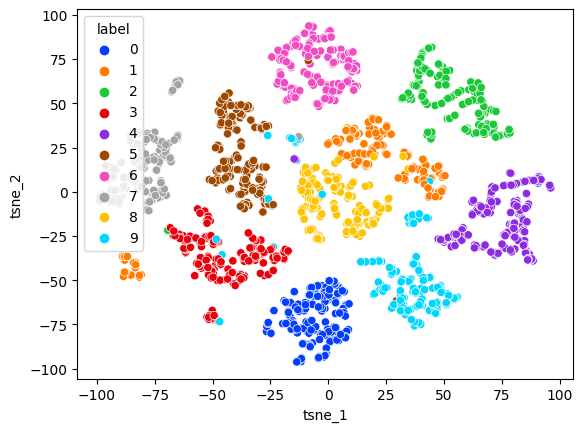

In [5]:
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df[0], palette='bright');

Перплексия = 25:

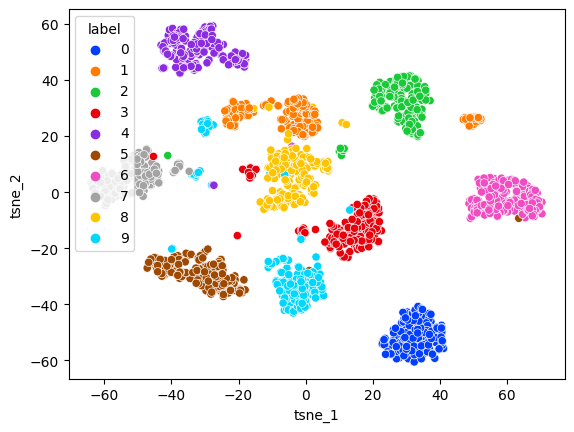

In [6]:
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df[1], palette='bright');

Перплексия = 50:

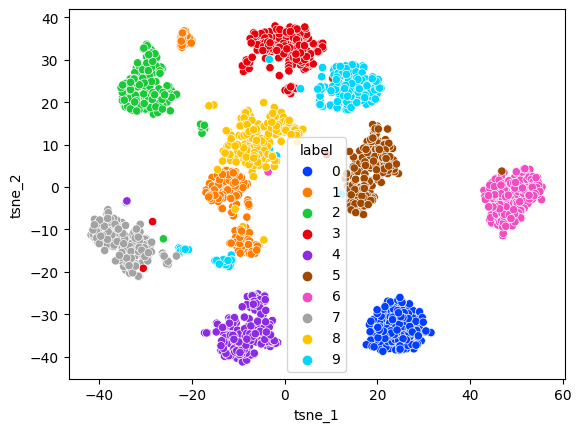

In [7]:
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df[2], palette='bright');

Применение UMAP.


In [8]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = dict()

time_start = time.time()

for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])]=(umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit(X))

time_end = time.time() - time_start

print('{:.3f} sec.'.format(time_end))

34.812 sec.


Вывод графика со значениями n_n = 5, m_d = 0.1:

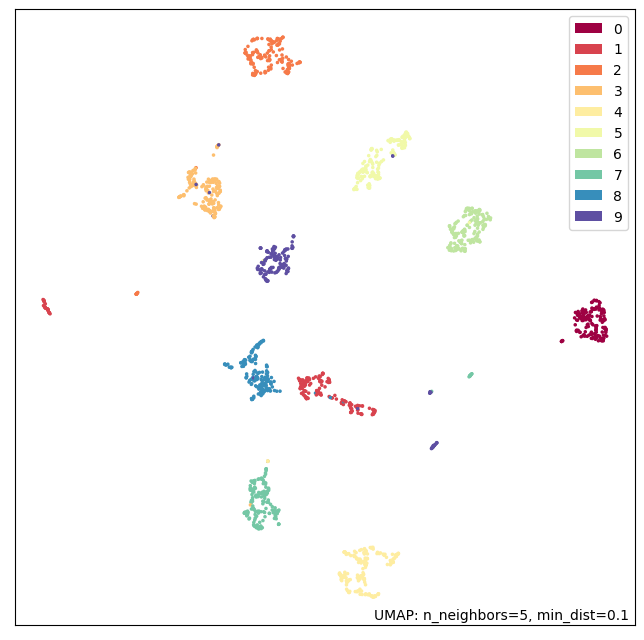

In [9]:
umapPlot.points(um[5, 0.1], labels=y);

Вывод графика со значениями n_n = 5, m_d = 0.6:

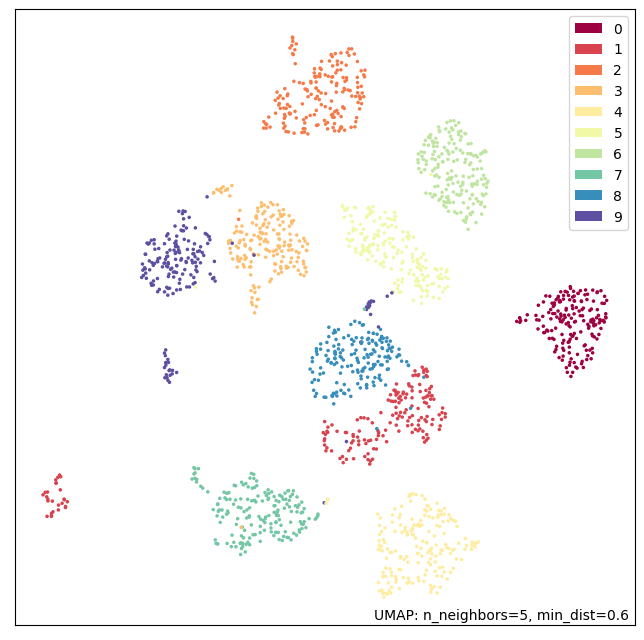

In [10]:
umapPlot.points(um[5, 0.6], labels=y);

Вывод графика со значениями n_n = 25, m_d = 0.1:

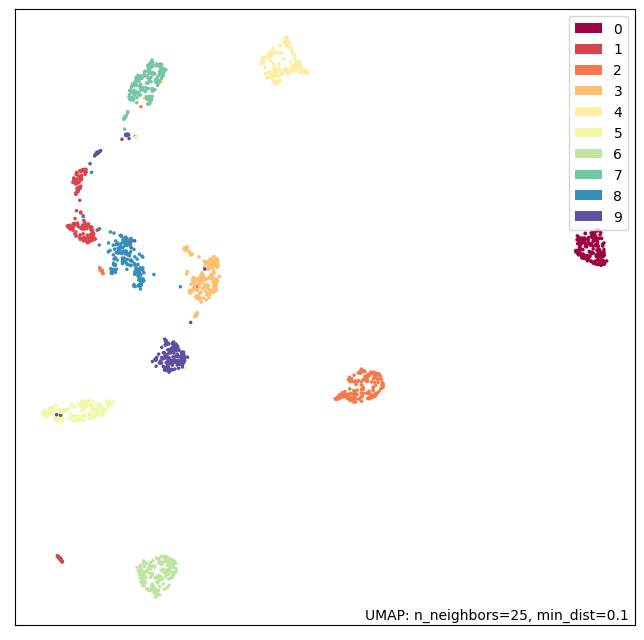

In [11]:
umapPlot.points(um[25, 0.1], labels=y);

Вывод графика со значениями n_n = 25, m_d = 0.6:

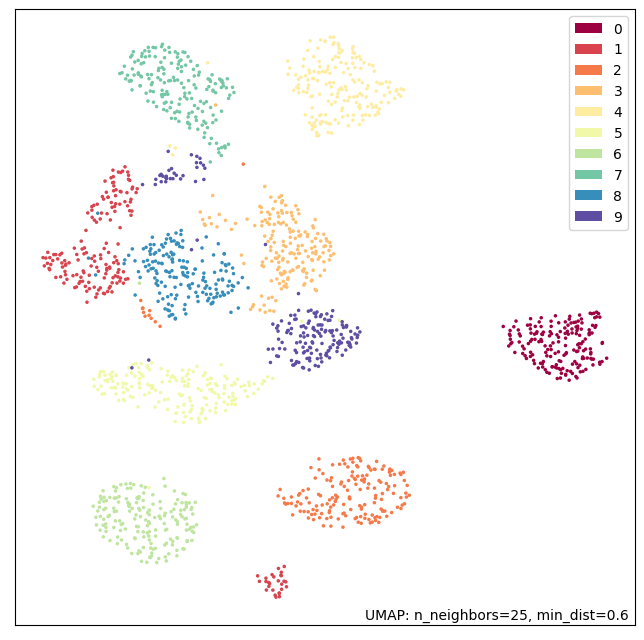

In [12]:
umapPlot.points(um[25, 0.6], labels=y);

Вывод графика со значениями n_n = 50, m_d = 0.1:

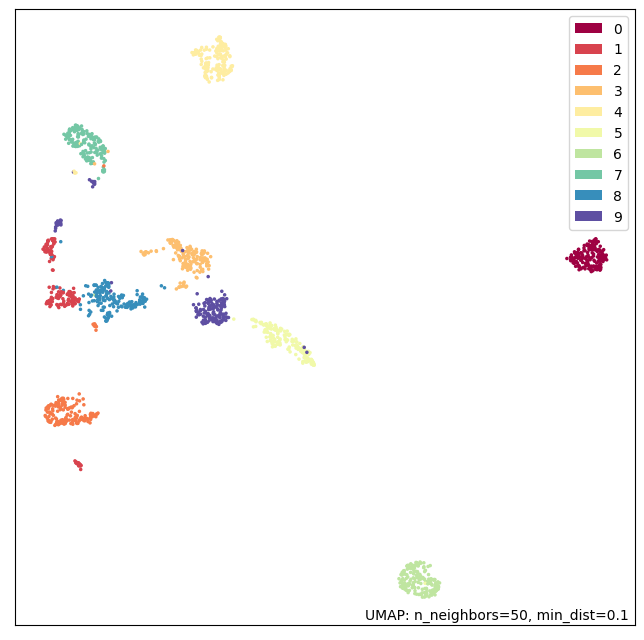

In [13]:
umapPlot.points(um[50, 0.1], labels=y);

Вывод графика со значениями n_n = 50, m_d = 0.6:

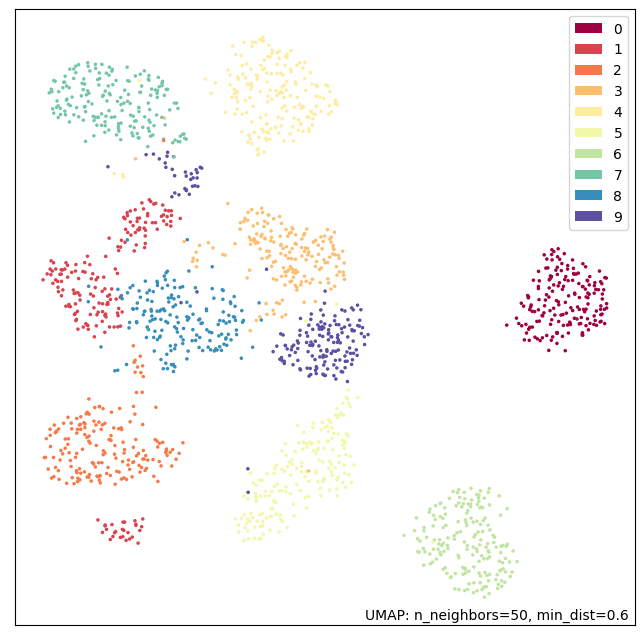

In [14]:
umapPlot.points(um[50, 0.6], labels=y);